In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os



In [2]:
img = image.load_img('Basedata/train/happy/img3.jpg')

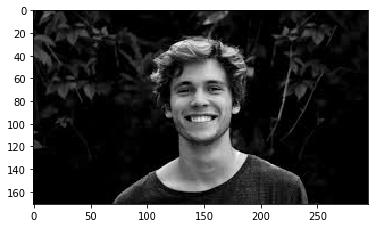

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('Basedata/train/happy/img3.jpg')

array([[[ 0,  0,  0],
        [ 4,  4,  4],
        [38, 38, 38],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 8,  8,  8]],

       [[ 0,  0,  0],
        [ 9,  9,  9],
        [35, 35, 35],
        ...,
        [ 1,  1,  1],
        [ 4,  4,  4],
        [ 9,  9,  9]],

       [[ 0,  0,  0],
        [17, 17, 17],
        [31, 31, 31],
        ...,
        [ 3,  3,  3],
        [ 6,  6,  6],
        [ 9,  9,  9]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [5]:
cv2.imread('Basedata/train/happy/img3.jpg').shape

(171, 295, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory('Basedata/train',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode='binary')

validation_dataset = train.flow_from_directory('Basedata/validation',
                                         target_size=(200,200),
                                         batch_size=3,
                                         class_mode='binary')

Found 41 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [9]:
validation_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                                          
                                    tf.keras.layers.Flatten(),
                                                          
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                                          
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                                          
                                ])

In [12]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
              metrics =  ['accuracy'])

In [13]:
model.fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 2s 471ms/step - loss: 5.3599 - accuracy: 0.5714 - val_loss: 0.6886 - val_accuracy: 0.6429
Epoch 2/30
5/5 [==============================] - 2s 396ms/step - loss: 1.5630 - accuracy: 0.4667 - val_loss: 0.7124 - val_accuracy: 0.5714
Epoch 3/30
5/5 [==============================] - 2s 404ms/step - loss: 0.7174 - accuracy: 0.5333 - val_loss: 0.7206 - val_accuracy: 0.4286
Epoch 4/30
5/5 [==============================] - 2s 395ms/step - loss: 0.6022 - accuracy: 0.6667 - val_loss: 0.8903 - val_accuracy: 0.5714
Epoch 5/30
5/5 [==============================] - 2s 399ms/step - loss: 1.1252 - accuracy: 0.6000 - val_loss: 0.6635 - val_accuracy: 0.7143
Epoch 6/30
5/5 [==============================] - 2s 385ms/step - loss: 0.6488 - accuracy: 0.7333 - val_loss: 0.6600 - val_accuracy: 0.5714
Epoch 7/30
5/5 [==============================] - 2s 394ms/step - loss: 0.4786 - accuracy: 0.7333 - val_loss: 0.6373 - val_accuracy: 0.6429
Epoch 8/30
5/5 [====

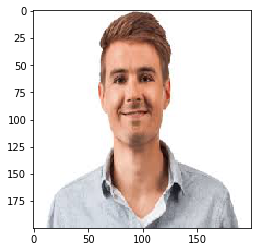

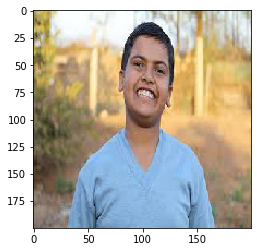

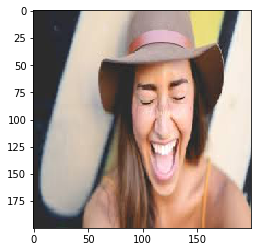

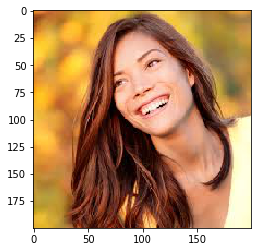

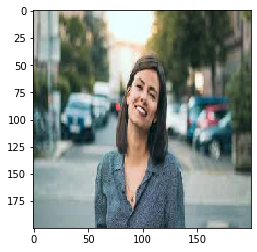

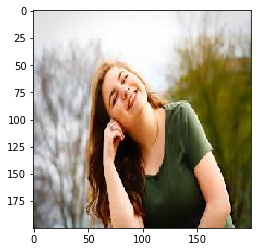

In [22]:
dir_path = 'Basedata/test/happy'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i, target_size= (200,200))
    plt.imshow(img)
    plt.show()

In [23]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0)
images = np.vstack([X])
val = model.predict(images)

if val == 0:
    print("You are NOT HAPPY :( ")
else:
    print("You are HAPPY :)) ")

You are HAPPY :)) 
